In [305]:
import blosum as bl
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt

score = bl.BLOSUM(62)
colors = ['white', 'green', 'red', 'blue']

In [306]:
alphabet = "ABCDEFGHIJKLMNPQRSTVWXYZ"
n = 15
m = 14
def mut(c):
    if random.random() < 0.7:
        return random.choice(alphabet)
    else:
        return c

s1 = ''.join(random.choices(alphabet, k=n))
chars = list(s1)
for i in reversed(random.choices(range(n), k=n-m)):
    chars.pop(i)   
s2 = ''.join([mut(c) for c in chars])

In [307]:
s1, s2

('GDEEFQNRLTDXMIQ', 'BBEXFGKLWMXXBQ')

In [308]:
dp = np.zeros((n + 1, m + 1), np.int64)
bt = np.zeros((n + 1, m + 1), np.int64)
bg = np.zeros((n + 1, m + 1), np.int64)

Fill in the dynamic programming matrix `dp`

In [309]:
maxij = (0,0)
for i, j in itertools.product(range(1, n+1), range(1, m+1)):
        if dp[i - 1, j - 1] + score[s1[i - 1] + s2[j - 1]] > dp[i,j]:
            dp[i,j] = dp[i - 1, j - 1] + score[s1[i - 1] + s2[j - 1]]
            bt[i,j] = 1
        if dp[i - 1, j] + score[s1[i - 1] + '*']  > dp[i,j]:
            dp[i,j] = dp[i - 1, j] + score[s1[i - 1] + '*']
            bt[i,j] = 2
        if dp[i, j - 1] + score["*" + s2[j - 1]] > dp[i,j]:
            dp[i,j] = dp[i, j - 1] + score["*" + s2[j - 1]]
            bt[i,j] = 3
        if dp[i,j] > dp[maxij]:
            maxij = (i,j)

And compute the actual optimal alignment

In [310]:
ij = maxij
alignment = []
while dp[ij] > 0:
    bg[ij] = 2
    (i,j) = (ij[0] - 1, ij[1] - 1)
    if bt[ij] == 1:
        if s1[i] == s2[j]:
            alignment.append((s1[i], '=', s2[j]))
        else:
            alignment.append((s1[i], 'X', s2[j]))
        ij = (ij[0] - 1, ij[1] - 1)
    elif bt[ij] == 2:
        alignment.append((s1[i], ' ', '*'))
        ij = (ij[0] - 1, ij[1])
    elif bt[ij] == 3:
        alignment.append((' ', '*', s2[j]))
        ij = (ij[0], ij[1] - 1)
bg[maxij] = 1    
bg[ij] = 3

In [311]:
for row in list(map(list, zip(*alignment))):
    print(''.join(reversed(row)))

DEEFQNRL
X=X= XX=
BEXF*GKL


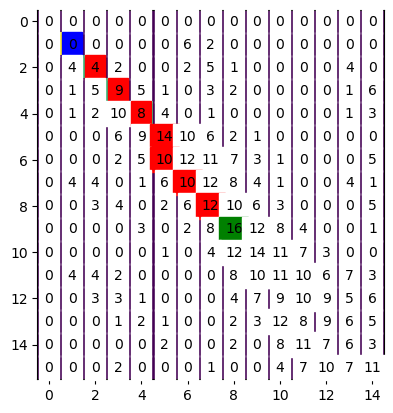

In [312]:
fig = plt.figure(clear = True)
for i in range(n+1):
    for j in range(m+1):
        plt.text(j, i, str(dp[i,j]), va='center', ha='center', backgroundcolor = colors[bg[i,j]])
plt.imshow(bg)